## DL Model Training

### 1. Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer,Activation,Dropout
from keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore")

### 2. Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('preprocessed.csv')

In [3]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.0,0.0,-1.34903,0.960817,1.457670,-0.102240,-1.414214,-0.816497,-1.414214,25,18,1.2
1,1.0,0.0,-1.34903,0.615199,1.457670,0.238559,-0.707107,-0.816497,-0.707107,32,16,1.4
2,0.0,0.0,-1.34903,-1.458506,1.059399,0.579358,0.000000,-0.816497,0.000000,40,8,0.8
3,1.0,0.0,-1.34903,-0.421653,0.661129,1.260957,0.707107,-0.816497,0.707107,68,10,0.5
4,0.0,0.0,-1.34903,0.269582,1.457670,1.942555,1.414214,-0.816497,1.414214,92,5,0.7


### 3. Preparing X and Y variables

In [4]:
X = df.drop(['roughness','tensile_strength','elongation'],axis=1)

In [5]:
X.shape

(50, 9)

In [6]:
y = df[['roughness','tensile_strength','elongation']]

In [7]:
y.shape

(50, 3)

### 4. Train_Test_Split 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 9), (10, 9), (40, 3), (10, 3))

### 4. Model Definition

In [9]:
model = Sequential()
model.add(Dense(32, input_dim=9))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                1

### 5. Model Training

In [12]:
history = model.fit(X_train, y_train, epochs=500, validation_split=0.20)

Epoch 1/500


1/1 [==============================] - 2s 2s/step - loss: 13637.1504 - mae: 63.3405 - val_loss: 10935.4355 - val_mae: 61.6828
Epoch 2/500
1/1 [==============================] - 0s 71ms/step - loss: 13630.5664 - mae: 63.2905 - val_loss: 10930.4180 - val_mae: 61.6563
Epoch 3/500
1/1 [==============================] - 0s 64ms/step - loss: 13628.4648 - mae: 63.2917 - val_loss: 10925.4023 - val_mae: 61.6296
Epoch 4/500
1/1 [==============================] - 0s 69ms/step - loss: 13617.5156 - mae: 63.2587 - val_loss: 10920.5332 - val_mae: 61.6024
Epoch 5/500
1/1 [==============================] - 0s 61ms/step - loss: 13615.0059 - mae: 63.2410 - val_loss: 10915.8145 - val_mae: 61.5759
Epoch 6/500
1/1 [==============================] - 0s 58ms/step - loss: 13603.4854 - mae: 63.1737 - val_loss: 10911.0322 - val_mae: 61.5484
Epoch 7/500
1/1 [==============================] - 0s 64ms/step - loss: 13604.5059 - mae: 63.1618 - val_loss: 10906.2578 - val_mae: 61.5208
Epoch 8/500
1/1 [===

1/1 [==============================] - 0s 87ms/step - loss: 12967.6680 - mae: 60.7296 - val_loss: 10384.3555 - val_mae: 58.7854
Epoch 56/500
1/1 [==============================] - 0s 104ms/step - loss: 12957.6064 - mae: 60.4911 - val_loss: 10357.2393 - val_mae: 58.6637
Epoch 57/500
1/1 [==============================] - 0s 89ms/step - loss: 12925.0430 - mae: 60.5411 - val_loss: 10329.0137 - val_mae: 58.5431
Epoch 58/500
1/1 [==============================] - 0s 106ms/step - loss: 12881.8389 - mae: 60.3118 - val_loss: 10299.5781 - val_mae: 58.4224
Epoch 59/500
1/1 [==============================] - 0s 84ms/step - loss: 12873.2969 - mae: 60.2980 - val_loss: 10268.6699 - val_mae: 58.2950
Epoch 60/500
1/1 [==============================] - 0s 99ms/step - loss: 12809.0107 - mae: 60.0282 - val_loss: 10236.3691 - val_mae: 58.1652
Epoch 61/500
1/1 [==============================] - 0s 67ms/step - loss: 12799.2715 - mae: 60.1327 - val_loss: 10202.5898 - val_mae: 58.0295
Epoch 62/500
1/1 [======

1/1 [==============================] - 0s 94ms/step - loss: 6788.3530 - mae: 44.0901 - val_loss: 5580.9092 - val_mae: 41.1412
Epoch 114/500
1/1 [==============================] - 0s 69ms/step - loss: 6648.9541 - mae: 44.2693 - val_loss: 5444.4956 - val_mae: 40.6269
Epoch 115/500
1/1 [==============================] - 0s 71ms/step - loss: 6778.7148 - mae: 45.1517 - val_loss: 5309.3623 - val_mae: 40.0925
Epoch 116/500
1/1 [==============================] - 0s 65ms/step - loss: 6237.9688 - mae: 42.8157 - val_loss: 5174.7417 - val_mae: 39.5354
Epoch 117/500
1/1 [==============================] - 0s 70ms/step - loss: 6509.6270 - mae: 43.3649 - val_loss: 5041.4810 - val_mae: 38.9588
Epoch 118/500
1/1 [==============================] - 0s 66ms/step - loss: 6449.2783 - mae: 43.0069 - val_loss: 4909.1318 - val_mae: 38.3631
Epoch 119/500
1/1 [==============================] - 0s 64ms/step - loss: 5930.2988 - mae: 42.3568 - val_loss: 4777.8677 - val_mae: 37.7462
Epoch 120/500
1/1 [===============

1/1 [==============================] - 0s 71ms/step - loss: 1921.6782 - mae: 25.4267 - val_loss: 2184.2808 - val_mae: 23.9348
Epoch 172/500
1/1 [==============================] - 0s 64ms/step - loss: 1575.7737 - mae: 23.0749 - val_loss: 2171.5620 - val_mae: 23.9241
Epoch 173/500
1/1 [==============================] - 0s 63ms/step - loss: 1607.9084 - mae: 24.2362 - val_loss: 2157.7251 - val_mae: 23.9009
Epoch 174/500
1/1 [==============================] - 0s 65ms/step - loss: 2018.8416 - mae: 25.4811 - val_loss: 2145.0142 - val_mae: 23.8770
Epoch 175/500
1/1 [==============================] - 0s 68ms/step - loss: 1487.3408 - mae: 23.3251 - val_loss: 2131.5579 - val_mae: 23.8452
Epoch 176/500
1/1 [==============================] - 0s 82ms/step - loss: 1559.6332 - mae: 23.5247 - val_loss: 2118.4500 - val_mae: 23.8099
Epoch 177/500
1/1 [==============================] - 0s 104ms/step - loss: 1992.3584 - mae: 24.8782 - val_loss: 2105.7700 - val_mae: 23.7773
Epoch 178/500
1/1 [==============

1/1 [==============================] - 0s 88ms/step - loss: 1119.6438 - mae: 19.0519 - val_loss: 1504.1265 - val_mae: 21.0669
Epoch 230/500
1/1 [==============================] - 0s 65ms/step - loss: 1092.3998 - mae: 19.0680 - val_loss: 1496.4304 - val_mae: 21.0383
Epoch 231/500
1/1 [==============================] - 0s 60ms/step - loss: 1183.6790 - mae: 19.5072 - val_loss: 1489.1193 - val_mae: 21.0144
Epoch 232/500
1/1 [==============================] - 0s 61ms/step - loss: 780.0237 - mae: 16.4777 - val_loss: 1482.1326 - val_mae: 20.9858
Epoch 233/500
1/1 [==============================] - 0s 70ms/step - loss: 994.9962 - mae: 17.7072 - val_loss: 1474.3652 - val_mae: 20.9588
Epoch 234/500
1/1 [==============================] - 0s 67ms/step - loss: 993.3934 - mae: 18.0955 - val_loss: 1465.6237 - val_mae: 20.9425
Epoch 235/500
1/1 [==============================] - 0s 81ms/step - loss: 638.8167 - mae: 14.7134 - val_loss: 1456.7397 - val_mae: 20.9215
Epoch 236/500
1/1 [===================

Epoch 288/500
1/1 [==============================] - 0s 78ms/step - loss: 914.5624 - mae: 17.7106 - val_loss: 1156.4836 - val_mae: 19.9994
Epoch 289/500
1/1 [==============================] - 0s 79ms/step - loss: 757.9431 - mae: 16.2832 - val_loss: 1151.9810 - val_mae: 19.9929
Epoch 290/500
1/1 [==============================] - 0s 111ms/step - loss: 707.6562 - mae: 15.4762 - val_loss: 1148.0076 - val_mae: 19.9766
Epoch 291/500
1/1 [==============================] - 0s 62ms/step - loss: 1025.6567 - mae: 18.3853 - val_loss: 1144.3439 - val_mae: 19.9422
Epoch 292/500
1/1 [==============================] - 0s 69ms/step - loss: 824.4736 - mae: 17.2822 - val_loss: 1141.0947 - val_mae: 19.9114
Epoch 293/500
1/1 [==============================] - 0s 69ms/step - loss: 800.3975 - mae: 16.0521 - val_loss: 1137.9197 - val_mae: 19.8764
Epoch 294/500
1/1 [==============================] - 0s 75ms/step - loss: 790.0411 - mae: 16.5935 - val_loss: 1134.8389 - val_mae: 19.8451
Epoch 295/500
1/1 [======

Epoch 347/500
1/1 [==============================] - 0s 77ms/step - loss: 657.1588 - mae: 15.3656 - val_loss: 974.7352 - val_mae: 19.5226
Epoch 348/500
1/1 [==============================] - 0s 65ms/step - loss: 681.5838 - mae: 14.9811 - val_loss: 972.1187 - val_mae: 19.5147
Epoch 349/500
1/1 [==============================] - 0s 63ms/step - loss: 612.8458 - mae: 14.6247 - val_loss: 969.9672 - val_mae: 19.4972
Epoch 350/500
1/1 [==============================] - 0s 68ms/step - loss: 886.6298 - mae: 17.0322 - val_loss: 967.9921 - val_mae: 19.4807
Epoch 351/500
1/1 [==============================] - 0s 63ms/step - loss: 836.7423 - mae: 17.0931 - val_loss: 966.3262 - val_mae: 19.4586
Epoch 352/500
1/1 [==============================] - 0s 73ms/step - loss: 720.9243 - mae: 14.9185 - val_loss: 964.7280 - val_mae: 19.4330
Epoch 353/500
1/1 [==============================] - 0s 70ms/step - loss: 746.6713 - mae: 15.5943 - val_loss: 963.4968 - val_mae: 19.4143
Epoch 354/500
1/1 [===============

1/1 [==============================] - 0s 76ms/step - loss: 552.2064 - mae: 13.4681 - val_loss: 919.3887 - val_mae: 19.5373
Epoch 407/500
1/1 [==============================] - 0s 69ms/step - loss: 590.8471 - mae: 14.5903 - val_loss: 918.9642 - val_mae: 19.5341
Epoch 408/500
1/1 [==============================] - 0s 80ms/step - loss: 864.4419 - mae: 16.6142 - val_loss: 917.8728 - val_mae: 19.5215
Epoch 409/500
1/1 [==============================] - 0s 68ms/step - loss: 675.2511 - mae: 15.7889 - val_loss: 916.7175 - val_mae: 19.5056
Epoch 410/500
1/1 [==============================] - 0s 63ms/step - loss: 549.4624 - mae: 14.2539 - val_loss: 915.3033 - val_mae: 19.4828
Epoch 411/500
1/1 [==============================] - 0s 66ms/step - loss: 492.4638 - mae: 12.6367 - val_loss: 914.7883 - val_mae: 19.4634
Epoch 412/500
1/1 [==============================] - 0s 80ms/step - loss: 739.7430 - mae: 15.5816 - val_loss: 913.7211 - val_mae: 19.4556
Epoch 413/500
1/1 [=============================

1/1 [==============================] - 0s 67ms/step - loss: 360.5557 - mae: 11.8417 - val_loss: 885.9583 - val_mae: 19.2789
Epoch 466/500
1/1 [==============================] - 0s 68ms/step - loss: 708.5806 - mae: 14.4816 - val_loss: 885.5146 - val_mae: 19.2822
Epoch 467/500
1/1 [==============================] - 0s 64ms/step - loss: 573.8051 - mae: 13.9435 - val_loss: 884.6981 - val_mae: 19.2859
Epoch 468/500
1/1 [==============================] - 0s 61ms/step - loss: 245.5633 - mae: 10.5755 - val_loss: 883.9164 - val_mae: 19.2970
Epoch 469/500
1/1 [==============================] - 0s 73ms/step - loss: 562.2406 - mae: 12.6730 - val_loss: 883.0851 - val_mae: 19.3207
Epoch 470/500
1/1 [==============================] - 0s 64ms/step - loss: 861.9963 - mae: 16.5219 - val_loss: 881.4410 - val_mae: 19.3286
Epoch 471/500
1/1 [==============================] - 0s 62ms/step - loss: 470.5292 - mae: 12.6086 - val_loss: 879.1603 - val_mae: 19.3253
Epoch 472/500
1/1 [=============================

### 6. Model Evaluation

In [13]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

#### 6.1. Loss and Error Curves

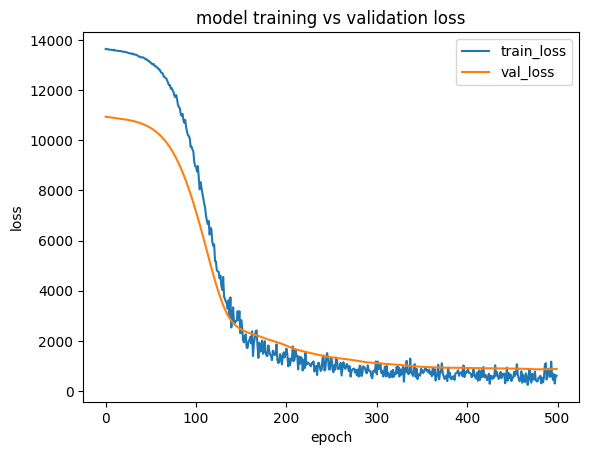

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

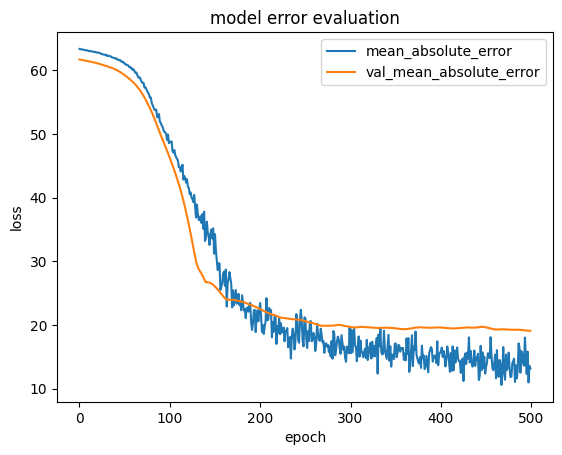

In [15]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model error evaluation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error','val_mean_absolute_error'])
plt.show()

#### 6.2. Evaluation on Test Data

In [16]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 50ms/step - loss: 819.4821 - mae: 16.1609


[819.4821166992188, 16.160903930664062]

##### Roughness

In [17]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 140ms/step


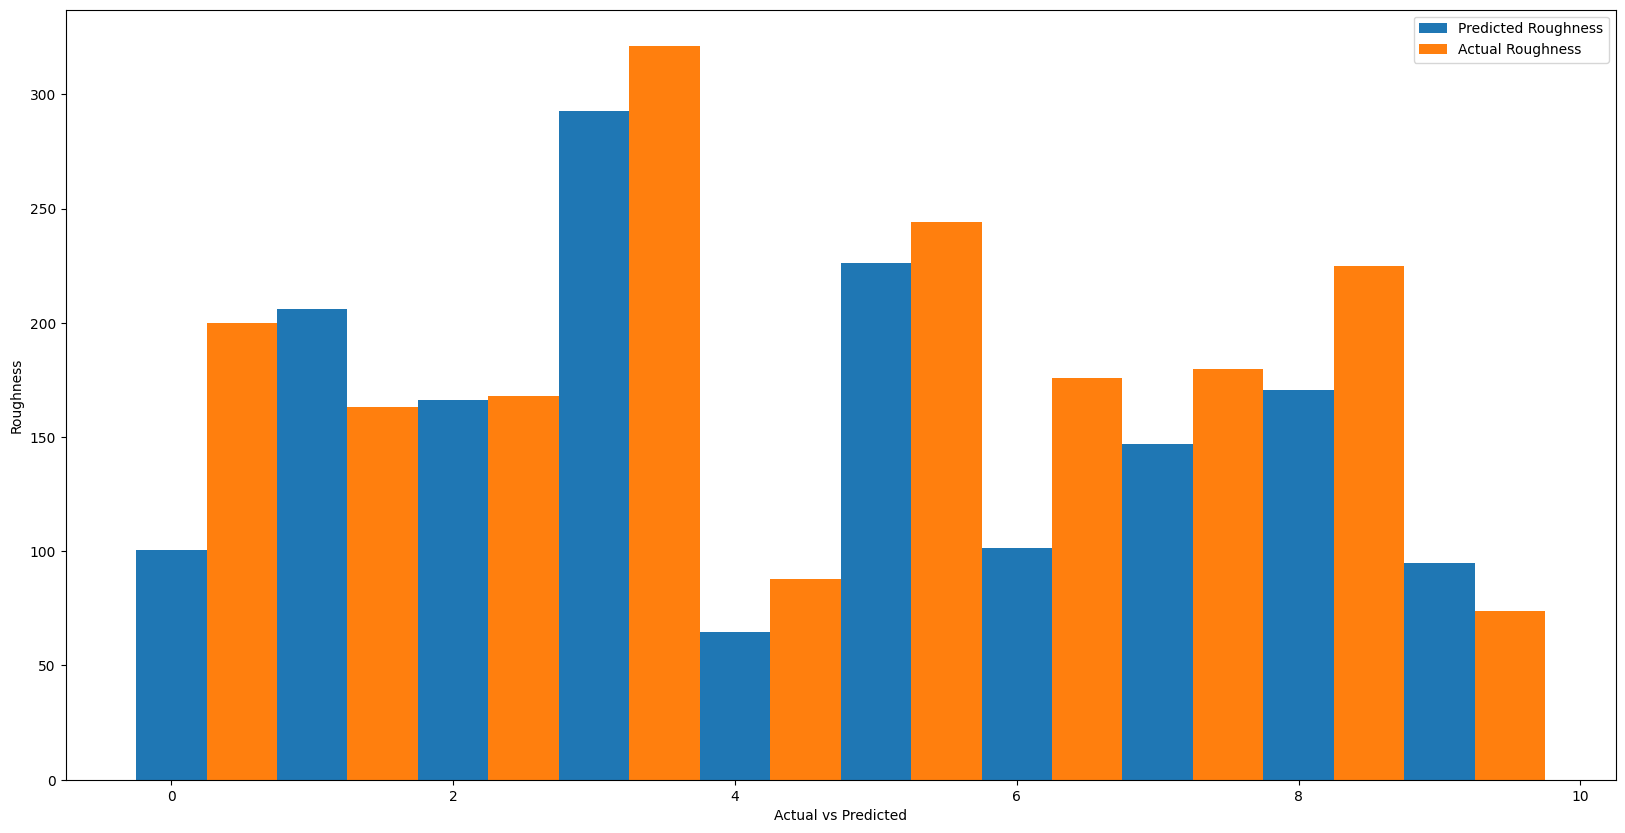

In [21]:
ind = np.arange(10)
plt.figure(figsize = (20,10))

width = 0.5

plt.bar(ind,predictions[:,0].tolist(),width,label = 'Predicted Roughness')
plt.bar(ind+width,y_test.iloc[:,0].tolist(),width,label = 'Actual Roughness')

plt.xlabel('Actual vs Predicted')
plt.ylabel('Roughness')

plt.legend()
plt.show()

##### Tensile Strength

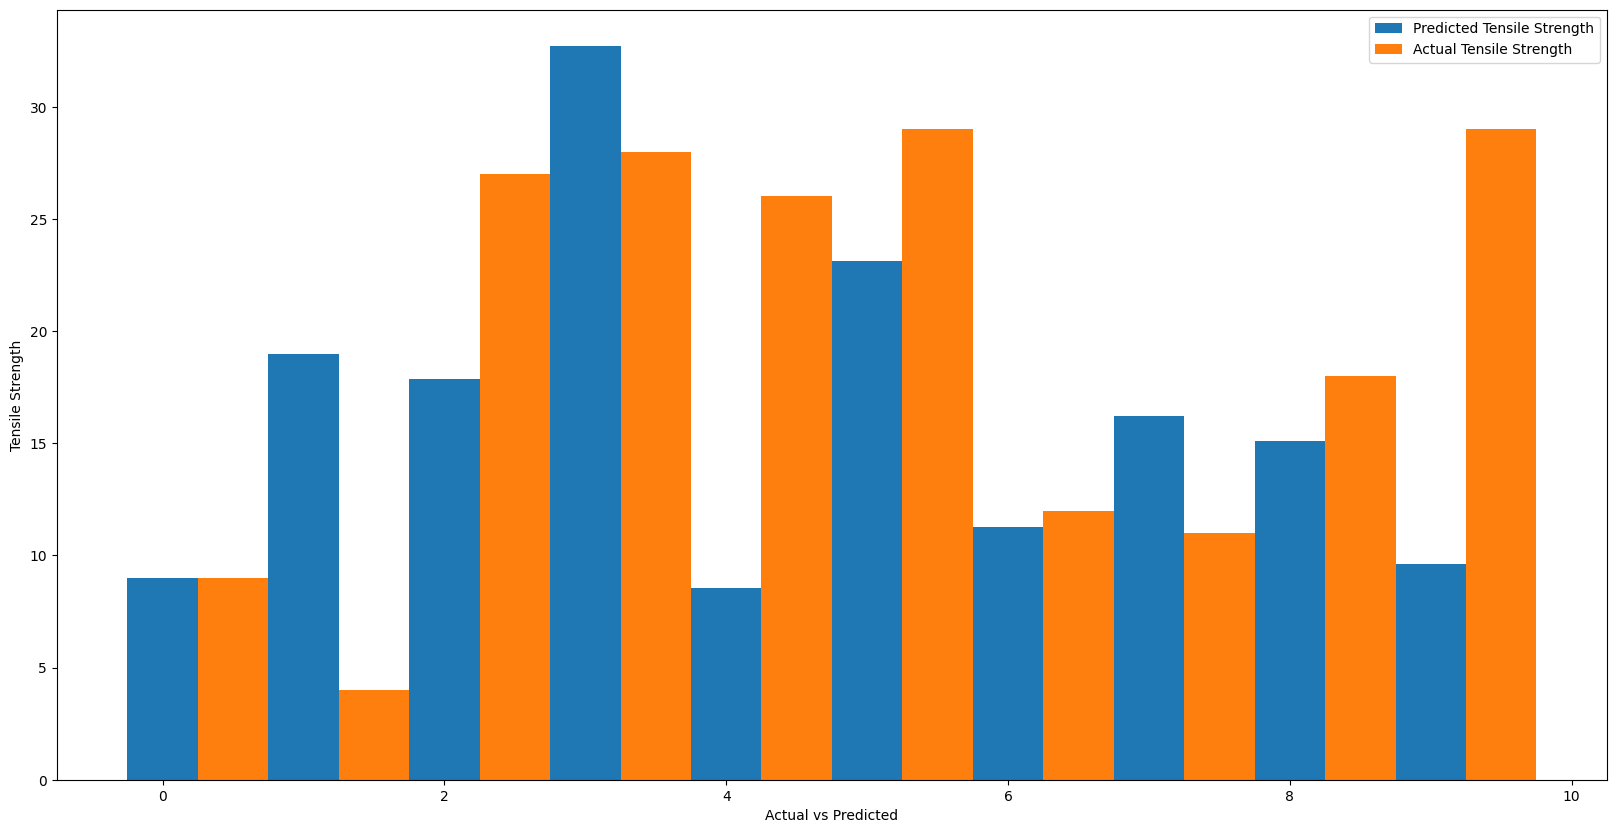

In [22]:
ind = np.arange(10)
plt.figure(figsize = (20,10))

width = 0.5

plt.bar(ind,predictions[:,1].tolist(),width,label = 'Predicted Tensile Strength')
plt.bar(ind+width,y_test.iloc[:,1].tolist(),width,label = 'Actual Tensile Strength')

plt.xlabel('Actual vs Predicted')
plt.ylabel('Tensile Strength')

plt.legend()
plt.show()

##### Elongation

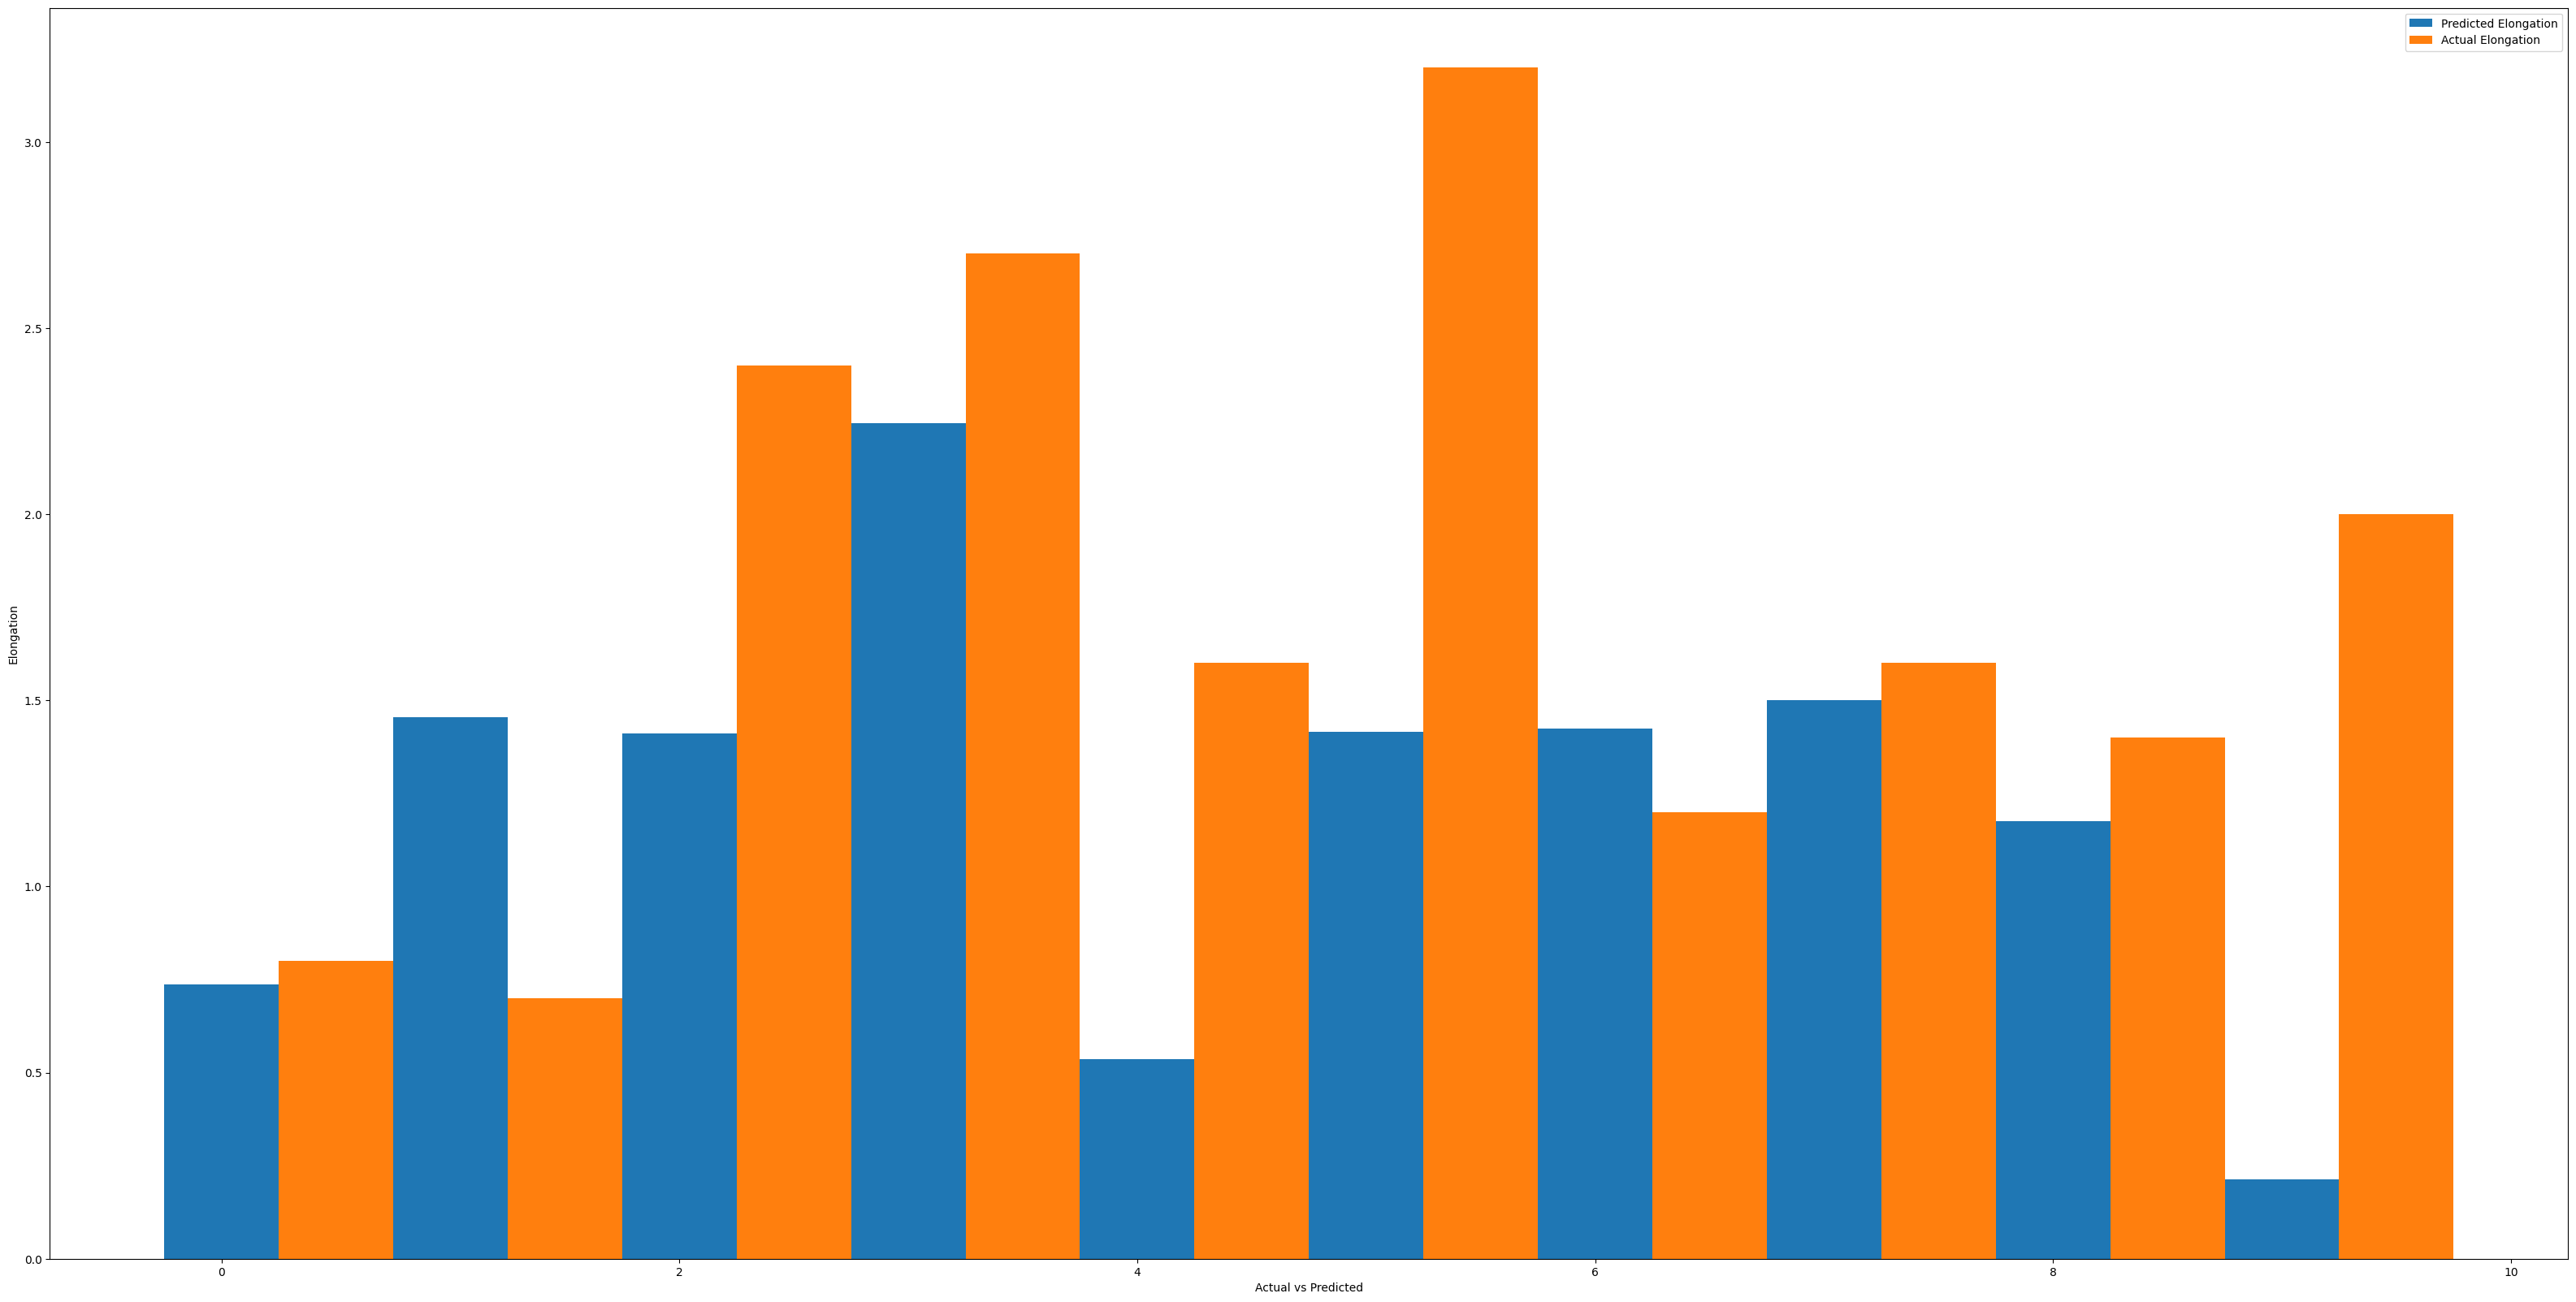

In [24]:
ind = np.arange(10)
plt.figure(figsize = (40,20))

width = 0.5

plt.bar(ind,predictions[:,2].tolist(),width,label = 'Predicted Elongation')
plt.bar(ind+width,y_test.iloc[:,2].tolist(),width,label = 'Actual Elongation')

plt.xlabel('Actual vs Predicted')
plt.ylabel('Elongation')

plt.legend()
plt.show()

### 7. Saving Model

In [25]:
model.save('dl_model.h5')

### 8. Comments

``Model performance is quite appropriate as per the amount of data provided for training the deep learning model; however, performance can be increased by feeding more and more data to the model for training.``